In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import seaborn as sns

In [2]:
# try running the following code, if you see errors on Windows OS
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [3]:
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
file_to_load = "Data\Steel_industry_data.csv"

# Read Purchasing File and store into Pandas data frame
steel_csv = pd.read_csv(file_to_load)
steel_csv.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [4]:
steel_csv.Load_Type.replace(('Medium_Load', 'Light_Load', 'Maximum_Load'),(1, 0, 2), inplace=True)
steel_csv.WeekStatus.replace(('Weekday', 'Weekend'),(1, 0), inplace=True)
steel_csv.Day_of_week.replace(('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'),(1, 2, 3, 4, 5, 6, 7), inplace=True)
steel_csv.head()
steel_y = steel_csv['CO2(tCO2)'].to_numpy()
steel_x = steel_csv[['Usage_kWh','Lagging_Current_Reactive.Power_kVarh','Load_Type']].fillna(0).to_numpy()

<AxesSubplot:>

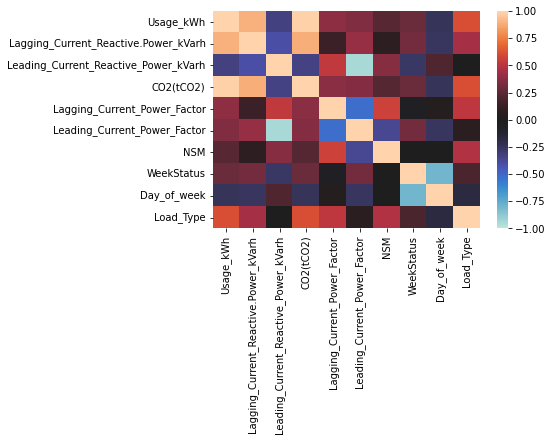

In [5]:
# Correlation
steel_corr=steel_csv.iloc[:,1:11].corr()
sns.heatmap(steel_corr, vmax=1, vmin=-1, center=0)

In [6]:
data_len = len(steel_csv)
steel_t = np.linspace(0, 0.25, data_len)
train_data_ratio = 0.8
data4train_len=(int)(data_len*train_data_ratio)
steel_x4train = steel_x[0:data4train_len]
steel_y4train = steel_y[0:data4train_len]
steel_t4train = steel_t[0:data4train_len]

steel_x4test = steel_x[data4train_len+1:data_len]
steel_y4test = steel_y[data4train_len+1:data_len]
steel_t4test = steel_t[data4train_len+1:data_len]
steel_x4nntrain=torch.from_numpy(steel_x4train)
steel_y4nntrain=torch.from_numpy(steel_y4train).type(torch.LongTensor)

train = torch.utils.data.TensorDataset(steel_x4nntrain, steel_y4nntrain)


In [7]:
reg_lasso = linear_model.Lasso(alpha=0.1)
reg_lasso.fit(steel_x4train,steel_y4train)
reg_lasso.coef_,reg_lasso.intercept_

(array([0.00038906, 0.        , 0.        ]), 0.0009431410331280799)

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
steel_pred = reg_lasso.predict(steel_x4test)
mean_squared_error(steel_y4test, steel_pred)

1.2160597741072231e-05